# Redes Neuronales

Las redes neuronales se usan para aproximar funciones complejas donde los datos de entrada se asocian con un dato de salida. Tienen aplicaciones en:

- Clasificación. A cada dato de entrada se le asocia una etiqueta.

- Regresión. A cada dato de entrada se le asocia un número.

No toda la IA son redes neuronales. Existen muchas otras técnicas como Máquinas de Vectores de Soporte, árboles de desición, vecino cercano, entre muchas otras. Las redes neuronales han tenido mucho éxito cuando los datos de entrenamiento son lo **suficientemente grandes**.

Las redes neuronales tradicionales se componen de una serie de operaciones lineales mas una función no lineal. Si $\mathbb{x}$ es el vector de entrada, éste se transforma usando la siguiente expressión:

$$\mathbb x_1=\sigma(L_1(\mathbb{x})+\mathbb{b}_1)$$

donde $L_1(\mathbb{x})=W_1\mathbb x$ es una transformación lineal ($W_1$ es una matriz), $\mathbb{b}_1$ es un vector llamado **bias** y $\sigma$ es una función no lineal llamada **función de activación**.

Este proceso se repite varias veces para transformar los datos cada vez más y extraer características que resulten útiles para hacer la predicción.

$$\mathbb x_2=\sigma(L_2(\mathbb{x_1})+\mathbb{b}_2)$$
$$\mathbb x_3=\sigma(L_3(\mathbb{x_2})+\mathbb{b}_3)$$
$$\vdots$$
$$\mathbb x_n=\sigma(L_n(\mathbb{x_{n-1}})+\mathbb{b}_n)$$

En la siguiente figura puede verse una configuración de una red neuronal donde la entrada tiene 6 dimensiones (características) y tiene una salida de 4 neuronas que pueden ser usadas para clasificar en 4 diferentes categorías.




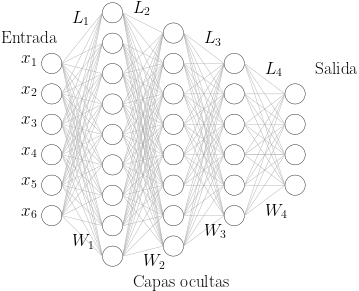

Tiene 3 capas ocultas ($L_1, L_2$ y $L_3$). Los tamaños de las matrices son: $W_1\in\mathcal{R}^{9\times6}$, $W_2\in\mathcal{R}^{8\times9}$, $W_3\in\mathcal{R}^{6\times8}$ y $W_4\in\mathcal{R}^{4\times6}$.

La última capa nos indicará la etiqueta que se le asignará a los datos. La salida será una dictribución de probabilidad de las diferentes categorías, es por eso que la función de activación será la **softmax**:

$$ \sigma(x)_i=\frac{e^{x_i}}{\sum_k e^{x_k}}  $$


A las redes neuronales también se les conoce como **aprendizaje profundo** no porque se tenga un gran entendimiento del proceso, sino que hace referencia a la profuncidad (el número de capas ocultas) de la red. Mientras más profunda, más complejas serán las características extraídas.

Ahora veremos un código de ejemplo sobre cómo se entrena un red neuronal.

## Preparar los datos

Como todo método de aprendizaje automático, se requieren los datos de donde se extraerá el conocimiento. Veamos un ejemplo con la base de datos MNIST.

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

MNIST es una base de datos de imágenes de dígitos escritos a mano. Cada dígito se clasifica en una de 10 categorías (números de 0 a 9) y son imágenes de 28 por 28 pixeles en escala de grises.

In [ ]:
(train, train_labels), (test, test_labels) = mnist.load_data()
print("Train", train.shape)
print("Test", test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train (60000, 28, 28)
Test (10000, 28, 28)


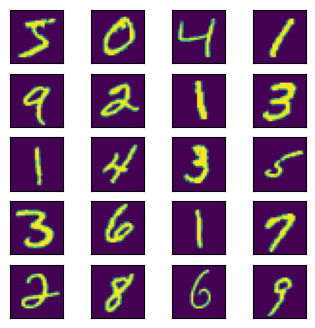

In [ ]:
fig=plt.figure(figsize=(4, 4))
for i in range(20):
    img = train[i]
    fig.add_subplot(5, 4, i + 1)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
plt.show()

Dividimos el conjunto de datos en Entrenamiento, Validación y Prueba.

In [ ]:
train, val, train_labels, val_labels = train_test_split(train,
                                                        train_labels,
                                                        test_size=0.1,
                                                        random_state=42)
print("Train", train.shape)
print("Val", val.shape)
print("Test", test.shape)

Train (54000, 28, 28)
Val (6000, 28, 28)
Test (10000, 28, 28)


En este ejemplo, la red neuronal recibirá como entrada vectores, así que tenemos que *aplanar* las imágenes para convertirlas en vectores. Los valores de los pixeles van de 0 a 255, siempre es buena idea tener valores entre 0 y 1 así que dividimos entre 255.

In [ ]:
train = train.reshape((54000, 28 * 28))
train = train.astype('float32') / 255
val = val.reshape((6000, 28 * 28))
val = val.astype('float32') / 255
test = test.reshape((10000, 28 * 28))
test = test.astype('float32') / 255

In [ ]:
train_labels[0: 10]

array([1, 6, 6, 7, 8, 4, 2, 7, 7, 6], dtype=uint8)

Como podemo ver, las etiquetas son números del 0 al 9. La salda de la red tendrá 10 neuronas, una por cada categoría, así que hay que convertir las etiquetas a vectores. Esto lo podemos hacer con la función `to_categorical`.

In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

In [ ]:
print(train_labels.shape)
train_labels[0: 10]

(54000, 10)


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

## Arquitectura de la red

Ahora vamos a construir la red neuronal. Debe tener una capa de entrada, donde recibirá los vectores de 784 dimensiones (28x28), una capa oculta y una capa de salida con 10 neuronas para la predicción.

Antes de crear las capas, debemos elegir el tipo de función de activación. Las más populares son sigmoid, tanh, relu y gelu.



In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import optimizers

import numpy as np

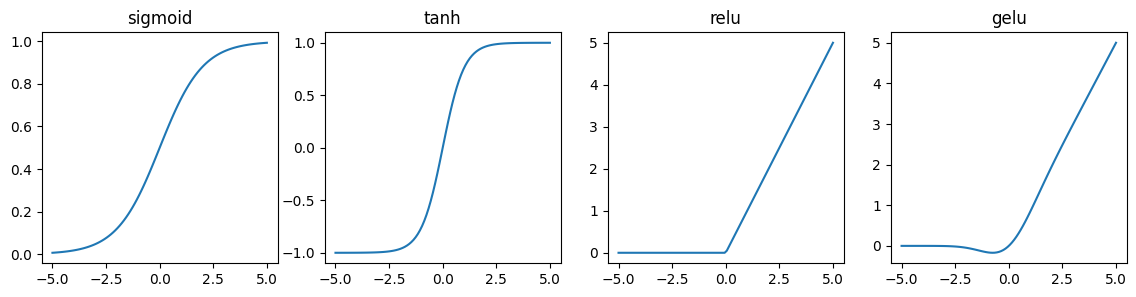

In [ ]:
acts = [activations.sigmoid, activations.tanh, activations.relu, activations.gelu]
act_names = ['sigmoid', 'tanh', 'relu', 'gelu']
def plot_act(acts, names):
    x = np.linspace(-5, 5, 100)
    fig, axs = plt.subplots(1, 4, figsize=(14, 3))
    i = 0
    for act, nm in zip(acts, names):
        y = act(x)
        axs[i ].plot(x, y)
        axs[i ].set_title(nm)
        i += 1
    plt.show()
plot_act(acts, act_names)


Vamos a elegir la sigmoid en nuestro código. Para crear la red neuronal usamos el modelo `Sequential` de **keras**. Se agregan capas con el método `add`. La primera capa debe tener la forma de la entrada mediante el parámetro `input_shape`. La última capa debe tener la activación **softmax**. Agregamos capas densas (Dense) e indicamos el número de neuronas que tendrá.

In [ ]:
network = models.Sequential()
network.add(layers.Dense(512, activation='sigmoid', input_shape=(28 * 28,)))
#network.add(layers.Dense(512, activation='sigmoid'))
network.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 Ya está creada la red neuronal. Vamos a ver su arquitectura con el método `summary`.

In [ ]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

## Optimización

Esta parte se verá mas a detalle en el siguiente notebook.

In [ ]:
opt = optimizers.SGD(learning_rate=0.001)
network.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## Entrenamiento

El entrenamiento es donde la red va a aprender de los datos. Al inicio, los parámetros de la red son números al azar, así que, en este punto, la red no sirve para clasificar números. El optimizador hará la actualización de los parámetros para hacer que la red prediga las etiquetas lo mejor posible.

De los datos completos, se tomará un pequeño lote y se actualziarán los parámetros una vez. Se tomará el siguiente lote y así sucesivamente hasta terminar con los datos de entrenamiento. El tamaño del lote es el parámetro `batch_size`.

Un **epoch** es cuando se revisan todos los datos del entrenamiento. A menudo conviene dar más de una pasada a los datos para seguir aprendiendo, eso lo hacemos con el parámetro `epochs`.

En este ejemplo, entrenamos en los datos `train`, con las etiquetas `train_labels`, el conjunto de validación es `val` y `val_labels`. Se entrenará por 10 epochs con un tamaño de lte de 128.

Como son 54000 ejemplos, se tienen 422 lotes que equivale a 422 actualizaciones de parámetros por epoch.

In [ ]:
history = network.fit(train,
                      train_labels,
                      validation_data=(val, val_labels),
                      epochs=10,
                      batch_size=128)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1981 - loss: 2.2334 - val_accuracy: 0.5635 - val_loss: 1.8880
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6111 - loss: 1.8023 - val_accuracy: 0.7278 - val_loss: 1.5538
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7405 - loss: 1.4863 - val_accuracy: 0.7722 - val_loss: 1.2986
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7848 - loss: 1.2448 - val_accuracy: 0.8012 - val_loss: 1.1104
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8083 - loss: 1.0707 - val_accuracy: 0.8183 - val_loss: 0.9734
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8213 - loss: 0.9476 - val_accuracy: 0.8302 - val_loss: 0.8723
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8342 - loss: 0.8495 - val_accuracy: 0.8420 - val_loss: 0.7955
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8435 - loss: 0.7768 - val_accur

## Graficamos la pérdida y el Accuracy

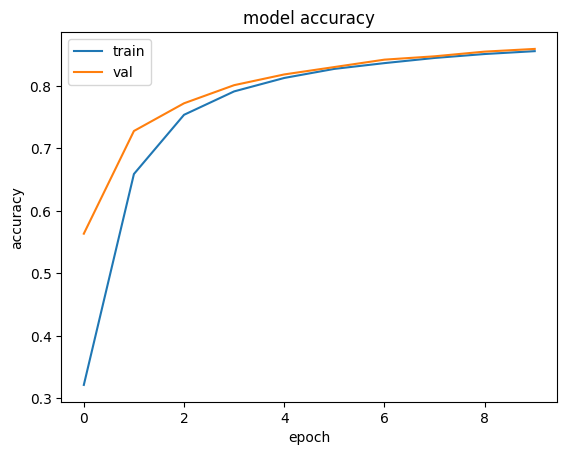

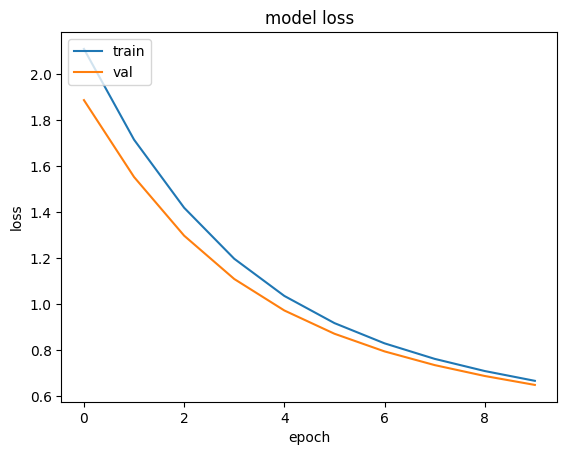

In [ ]:
#plot history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Evaluación

Después de que se hizo el entrenamiento y estamos satisfechos con los resultados en el conjunto de evaluación, se debe evaluar en el conjunto de prueba. Esto lo podemos hacer con el método `predict`.

In [ ]:
pred = network.predict(test)
print(pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
(10000, 10)


In [ ]:
pred[0]

array([0.00797986, 0.00206821, 0.00557187, 0.00922783, 0.01540729,
       0.00674081, 0.00201109, 0.8888234 , 0.00993541, 0.05223434],
      dtype=float32)

La función `clasification_report` de `sklearn` es muy útil para evaluar las métricas más comunes en clasificación.

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
print(classification_report(test_labels, np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       980
           1       0.90      0.96      0.93      1135
           2       0.90      0.83      0.86      1032
           3       0.85      0.87      0.86      1010
           4       0.86      0.86      0.86       982
           5       0.86      0.74      0.80       892
           6       0.87      0.92      0.90       958
           7       0.89      0.86      0.87      1028
           8       0.81      0.82      0.81       974
           9       0.82      0.84      0.83      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



Ya para finalizar mostramos de forma gráfica algunas predicciones.

In [ ]:
import matplotlib.pyplot as plt

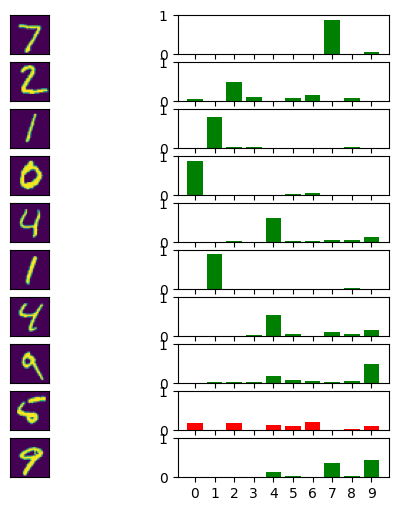

In [ ]:
fig=plt.figure(figsize=(6, 6))
for i in range(10):
    img = test[i].reshape(28, 28)
    p = pred[i]
    if pred[i].argmax() == test_labels[i]:
        color = 'green'
    else:
        color = 'red'
    fig.add_subplot(10, 2, 2 * i + 1)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(10, 2, 2 * i + 2)
    plt.bar(range(10), p, color=color)
    plt.xticks(range(10))
    plt.ylim(0, 1)
plt.show()